# Application Codes
# Execution: Kernel -> Restart & Run All
# <font color = blue>See Project Documentation for details</font>

### Setting variables

In [1]:
import os
vType = "ALL"
randomSeed = 1037
numSamples = 250 #Max Num of slice samples from each file
vectorDim = 30 #num of vector cols
slicePath = './data/slicesSource/'
tokenPath = './data/token/SARD/'
w2vmodelPath = './w2vModel/model/w2vModel_ALL'
vectorPath =  './data/vector/'
vectorTrainPath = './data/DLvectors/train/'
vectorTestPath = './data/DLvectors/test/'
dlInputsTrainPath = './data/DLinputs/train/'
dlInputsTestPath  = './data/DLinputs/test/'

### A. slicesToTokens.py

In [2]:
from slicesToTokens import *
mycase_ID = tokenizeSlices(slicePath, tokenPath, numSamples)

Slice Files To be Processed:  API function call.txt
Total Corpus Files:  250
Last Program ID:  8339
Slice Files To be Processed:  Arithmetic expression.txt
Total Corpus Files:  250
Last Program ID:  298285
Slice Files To be Processed:  Array usage.txt
Total Corpus Files:  250
Last Program ID:  58678
Slice Files To be Processed:  Pointer usage.txt
Total Corpus Files:  250
Last Program ID:  249


### B.  isDuplicatedID.py

In [3]:
from isDuplicatedID import *
print("The dataset has duplicated ID: ", isDuplicatedID(mycase_ID))

The dataset has duplicated ID:  False


### C. tokensToVectors.py

In [4]:
from tokensToVectors import *
myW2Vmodel = createW2VModel(w2vmodelPath, tokenPath, vectorDim)
fitW2VModel(w2vmodelPath, tokenPath, vectorPath)

Fitting W2V model from corpus...
Model created and saved in: ./w2vModel/model/w2vModel_ALL
Number of words in model: 497
W2V Completed: The vector file is in vector folder


### D. splitTrainTest.py

In [5]:
from splitTrainTest import *
splitTrainTest(vType, vectorPath, vectorTrainPath, vectorTestPath,randomSeed, split = 0.8 )

Samples in Train set:  1600
Samples in Test set:  400
Finished Splitting data with seed number:  1037
Train/Test Sets saved in DLVectors folder


### E. downSampling.py

In [6]:
from downSampling import *
caseID_one,caseID_zero,downsampleNum = appendCaseIDLabel0(vectorTrainPath)
downsampling (caseID_one,caseID_zero, downsampleNum , randomSeed, vectorPath, vectorTrainPath)
#Optional used to check if the class label are balanced 
print("Class Label is balanced: " , isClassBalanced(vectorTrainPath))

./data/DLvectors/train/ALL_train.pkl
Elements in each vector .pkl file:  6
./data/DLvectors/train/balancedClassTrain.pkl
Elements in each vector .pkl file:  6
Downsampling with seed number:  1037
Done! balancedClassTrain.pkl saved in ./data/DLvectors/train/ 
balancedClassTrain.pkl
total label 0:  184
total label 1:  184
total sample:  368
Class Label is balanced:  True


### F. adjustVectorLen.py

In [7]:
from adjustVectorLen import *
avg = meanLen(vectorTrainPath)
tranformVectorLen(vectorTrainPath, vectorTestPath, dlInputsTrainPath, dlInputsTestPath, avg, vectorDim, vType)
print("New Vector Length (rows x cols): " ,avg, " x " ,vectorDim)


Loading data...
./data/DLvectors/train/balancedClassTrain.pkl
Mean Vector Length 131
Loading data...
Train set
./data/DLvectors/train/balancedClassTrain.pkl
threshold:  3930
New Vector Length:  131

Test set
./data/DLvectors/test/ALL_test.pkl
threshold:  3930
New Vector Length:  131
New Vector Length (rows x cols):  131  x  30


### G. saveKeyData.py

In [8]:
from saveKeyData import *
saveKeyData(dlInputsTrainPath)
saveKeyData(dlInputsTestPath)

Save metadata from filename: DL_Final_balancedClassTrain.pkl
['0', '1', '100', '109', '11', '113', '116', '12', '120', '122', '124', '13', '130', '132', '133', '134', '135', '136', '137', '146'] 

[1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0] 

['PTR', 'PTR', 'PTR', 'PTR', 'PTR', 'PTR', 'PTR', 'PTR', 'PTR', 'PTR', 'PTR', 'PTR', 'PTR', 'PTR', 'PTR', 'PTR', 'PTR', 'PTR', 'PTR', 'PTR'] 

Save metadata from filename: DL_Final_ALL_test.pkl
['298161', '298269', '77', '1298168', '53', '206', '8299', '1298105', '1298046', '1000159', '1058510', '1000002', '1000109', '1058632', '1298160', '58666', '8273', '1000146', '8321', '298171'] 

[0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0] 

['AE', 'AE', 'PTR', 'AE', 'PTR', 'PTR', 'API', 'AE', 'AE', 'PTR', 'ARR', 'PTR', 'PTR', 'ARR', 'AE', 'ARR', 'API', 'PTR', 'API', 'AE'] 



### H. DLModel.py

In [9]:
from DLModel import *
myoptimizer = 'adam' #can be changed to ‘adamax’
maxlen = avg #avg calculated from part 5.6
layers = 2
dropout = 0.2 
batchSize = 32
vectorDim = 30

Using TensorFlow backend.


### Network Architechture

### Part A: BRNN

In [10]:
#Build BRNN Model with parameters 
myKerasModel =  buildBGRU(maxlen, vectorDim, layers, dropout,myoptimizer )

#Fit BRNN Model with trained data and saved the model for later use
weightpath = './model/BGRU_ALL' + myoptimizer +str(randomSeed)
mymodel = fitModel(myKerasModel, weightpath, dlInputsTrainPath, batchSize, maxlen, vectorDim, randomSeed)

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 131, 30)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 131, 512)          440832    
_________________________________________________________________
dropout_1 (Dropout)          (None, 131, 512)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 512)               1181184   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 1,622,529
Trainable params: 1,622,529
Non-trainable params: 0
_____________________________

### Part B: BLSTM

In [11]:
#Build BLSTMModel with parameters 
myKerasModel =  buildBLSTM(maxlen, vectorDim, layers, dropout,myoptimizer )

#Fit BLSTM Model with trained data and saved the model for later use
weightpath = './model/BLSTM_ALL' + myoptimizer +str(randomSeed)
mymodel = fitModel(myKerasModel, weightpath, dlInputsTrainPath, batchSize, maxlen, vectorDim, randomSeed)


Build model...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_2 (Masking)          (None, 131, 30)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 131, 512)          587776    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 512)               1181184   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 1,769,473
Trainable params: 1,769,473
Non-trainable params: 0
_________________________________________________________________
Fit model with Trainning set...
DL_Final_balancedClassTrain.pkl
368 368
start
Epoch 1/10
11/11 

### I. DLPrediction.py

In [12]:
#all parameters are same as section 5.8
from DLModel import *
from DLPrediction import *
myoptimizer = 'adam'
maxlen = avg
layers = 2
dropout = 0.2 
batchSize = 32

#### Input: 	
- final test set and saved model

#### Output:   
- output values and predicted values from Model saved to excel file: OutputSummary_adamRandomseed.xlsx

### Part A: BRNN

In [13]:
modelName = 'BGRU'
weightpath = './model/BGRU_ALL' + myoptimizer +str(randomSeed)
myKerasModelADAM =  buildBGRU(maxlen,vectorDim, layers, dropout,myoptimizer )
myKerasModelADAM.load_weights(weightpath)
testID_label, output_dl_labels, mypredicted_labels, myreallabels, myvtypelabels  = predictLabel(myKerasModelADAM, dlInputsTestPath, maxlen, vectorDim, myoptimizer, modelName, randomSeed)


Build model...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_3 (Masking)          (None, 131, 30)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 131, 512)          440832    
_________________________________________________________________
dropout_4 (Dropout)          (None, 131, 512)          0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 512)               1181184   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 1,622,529
Trainable params: 1,622,529
Non-trainable params: 0
_____________________________

### Part B: BLSTM

In [14]:
modelName = 'BGRU'
weightpath = './model/BGRU_ALL' + myoptimizer +str(randomSeed)
myKerasModelADAM2 =  buildBGRU(maxlen,vectorDim,layers,dropout,myoptimizer )
myKerasModelADAM2.load_weights(weightpath)
testID_label2, output_dl_labels2, mypredicted_labels2, myreallabels2, myvtypelabels  = predictLabel(myKerasModelADAM2, dlInputsTestPath, maxlen, vectorDim, myoptimizer, modelName, randomSeed)


Build model...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_4 (Masking)          (None, 131, 30)           0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 131, 512)          440832    
_________________________________________________________________
dropout_6 (Dropout)          (None, 131, 512)          0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 512)               1181184   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 1,622,529
Trainable params: 1,622,529
Non-trainable params: 0
_____________________________

## J. ConfusionMatrix.py

#### Input: 	
- predicted label and real label from part I

#### Output:   
- confusion matrix 

In [15]:
from ConfusionMatrix import *
getConfusionMatrix(mypredicted_labels, myreallabels)#BRNN
getConfusionMatrix(mypredicted_labels2, myreallabels2)#BLSTM

Predicted Class
Total Samples 400.0
| Type     |   Positive |   Negative |
|----------+------------+------------|
| Positive |         96 |          9 |
| Negative |        228 |         67 |

Predicted Class
╒══════════╤═════════════════════╤════════════════════╤═════════════════════╤═════════════╕
│          │ Positive            │ Negative           │ Rate                │             │
╞══════════╪═════════════════════╪════════════════════╪═════════════════════╪═════════════╡
│ Positive │ 96.0                │ 9.0                │ 0.9142857193946838  │ Sensitivity │
├──────────┼─────────────────────┼────────────────────┼─────────────────────┼─────────────┤
│ Negative │ 228.0               │ 67.0               │ 0.22711864113807678 │ specificity │
├──────────┼─────────────────────┼────────────────────┼─────────────────────┼─────────────┤
│          │ 0.29629629850387573 │ 0.8815789222717285 │ 0.4074999988079071  │ Accuracy    │
├──────────┼─────────────────────┼────────────────────┼

---

--- 

# Output Analysis

In [16]:
import numpy as np
import pandas as pd
import os

fileName = "OutputSummary_adamBGRU1037.xlsx"
DLdata = pd.read_excel(fileName)
DLdata.head(10)

,Unnamed: 0,TestID,DLOutput,PredLabel,RealLabel,Vtype
0,0,298161,0.780302,1,0,AE
1,1,298269,0.767056,1,1,AE
2,2,77,0.539309,1,0,PTR
3,3,1298168,0.797551,1,1,AE
4,4,53,0.435483,0,0,PTR
5,5,206,0.739711,1,0,PTR
6,6,8299,0.905015,1,1,API
7,7,1298105,0.717868,1,0,AE
8,8,1298046,0.803715,1,0,AE
9,9,1000159,0.684277,1,1,PTR


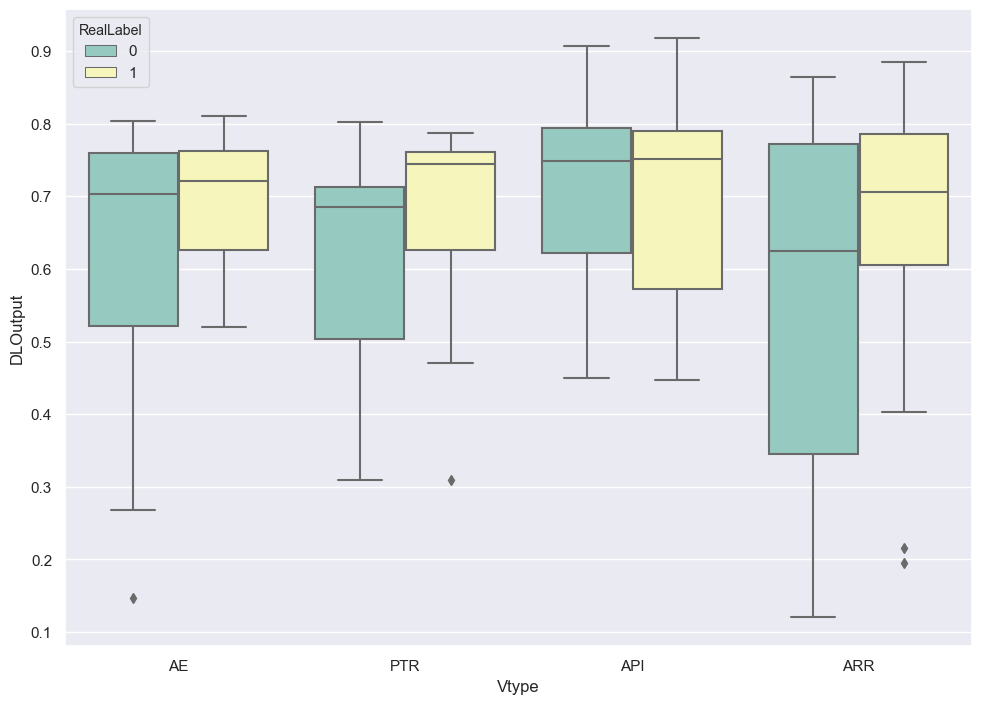

In [17]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="Vtype", y='DLOutput', hue='RealLabel', data=DLdata, linewidth=1.5, palette="Set3")

## K. evaluateModels.py

In [18]:
from evaluateModels import *
thresdArray = [0.40, 0.45,0.5, 0.53, 0.55, 0.58, 0.60, 0.65, 0.70, 0.8]
mydata, recall, precision, specificity, F1, Accuracy, balanceAccuracy  = combinedPredictions(thresdArray, DLdata)
mydata.to_excel("predictionWithDiffThreshold_adamBGRU.xlsx")  
mydata.head(10)

,Unnamed: 0,TestID,DLOutput,PredLabel,RealLabel,Vtype,Pred0.4,Metric0.4,Pred0.45,Metric0.45,...,Pred0.58,Metric0.58,Pred0.6,Metric0.6,Pred0.65,Metric0.65,Pred0.7,Metric0.7,Pred0.8,Metric0.8
0,0,298161,0.780302,1,0,AE,1,FP,1,FP,...,1,FP,1,FP,1,FP,1,FP,0,TN
1,1,298269,0.767056,1,1,AE,1,TP,1,TP,...,1,TP,1,TP,1,TP,1,TP,0,FN
2,2,77,0.539309,1,0,PTR,1,FP,1,FP,...,0,TN,0,TN,0,TN,0,TN,0,TN
3,3,1298168,0.797551,1,1,AE,1,TP,1,TP,...,1,TP,1,TP,1,TP,1,TP,0,FN
4,4,53,0.435483,0,0,PTR,1,FP,0,TN,...,0,TN,0,TN,0,TN,0,TN,0,TN
5,5,206,0.739711,1,0,PTR,1,FP,1,FP,...,1,FP,1,FP,1,FP,1,FP,0,TN
6,6,8299,0.905015,1,1,API,1,TP,1,TP,...,1,TP,1,TP,1,TP,1,TP,1,TP
7,7,1298105,0.717868,1,0,AE,1,FP,1,FP,...,1,FP,1,FP,1,FP,1,FP,0,TN
8,8,1298046,0.803715,1,0,AE,1,FP,1,FP,...,1,FP,1,FP,1,FP,1,FP,1,FP
9,9,1000159,0.684277,1,1,PTR,1,TP,1,TP,...,1,TP,1,TP,1,TP,0,FN,0,FN


## L. plotCounts.py

C:\Users\Frank\Documents\PSU\Senior Year\Fall 2024\CS 441 - AI\CS-441---Final-Project\Source Programs\plotCounts.py:20: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color = colors, label=names)
C:\Users\Frank\.conda\envs\myenv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


FP    228
TP     96
TN     67
FN      9
Name: Metric0.5, dtype: int64


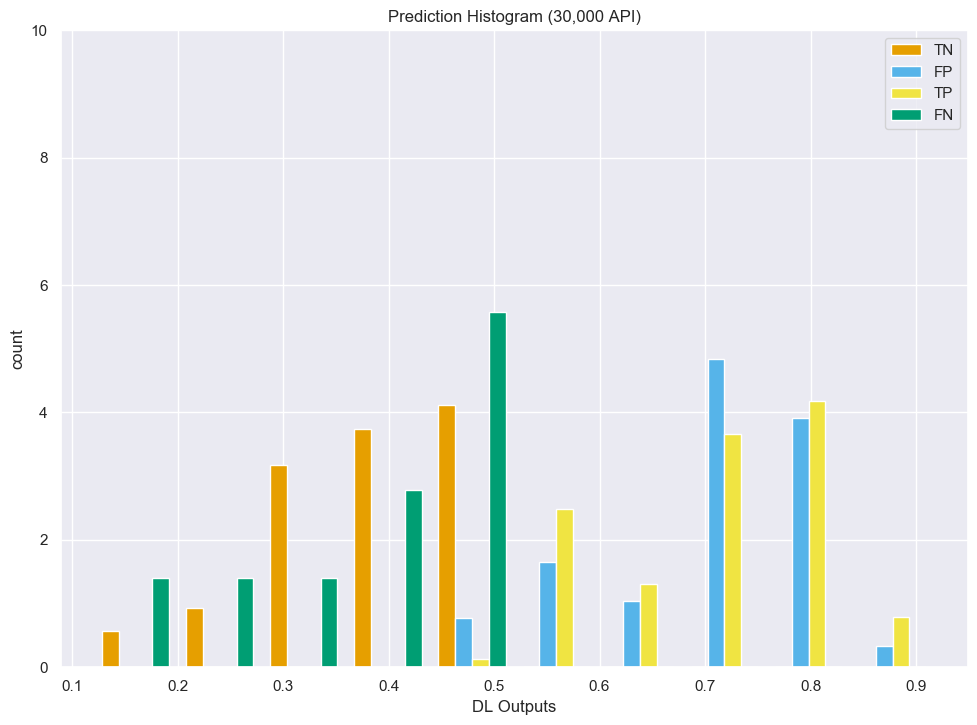

In [19]:
from plotCounts import *
colName = "Metric0.5"
mydata = mydata
plotHistogram(mydata, colName)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Frank\.conda\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Frank\AppData\Local\Temp\ipykernel_14040\156506994.py", line 1, in <module>
    plotBar(mydata, colName)
  File "C:\Users\Frank\Documents\PSU\Senior Year\Fall 2024\CS 441 - AI\CS-441---Final-Project\Source Programs\plotCounts.py", line 36, in plotBar
    bins = 10)
  File "C:\Users\Frank\.conda\envs\myenv\lib\site-packages\matplotlib\pyplot.py", line 2636, in hist
    **({"data": data} if data is not None else {}), **kwargs)
  File "C:\Users\Frank\.conda\envs\myenv\lib\site-packages\matplotlib\__init__.py", line 1589, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "C:\Users\Frank\.conda\envs\myenv\lib\site-packages\matplotlib\axes\_axes.py", line 6707, in hist
    raise ValueError(error_message)
ValueError: color kwarg must have one colo

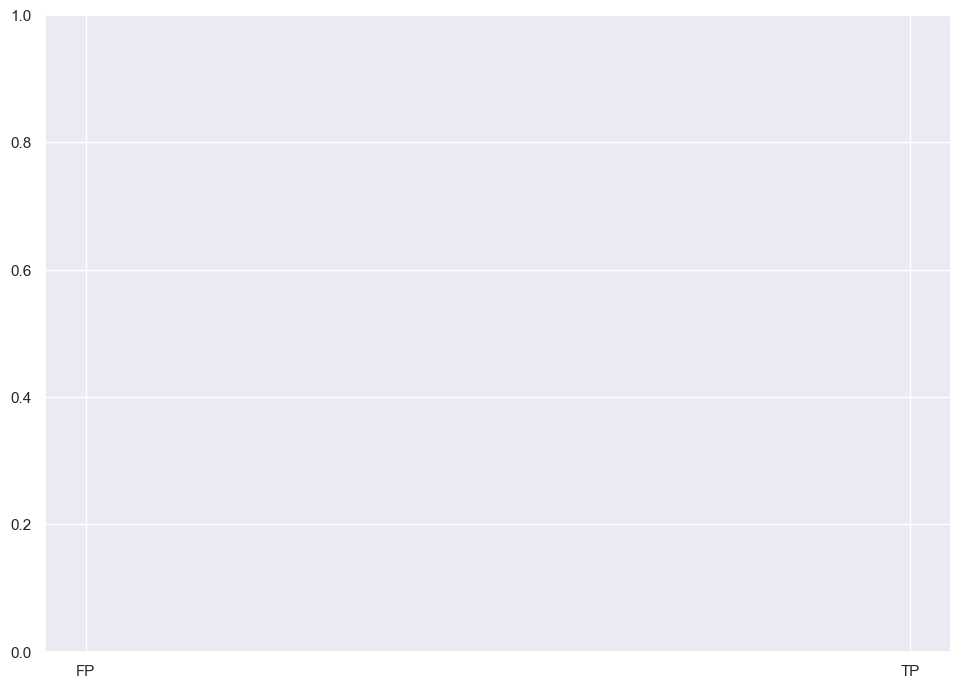

In [ ]:
plotBar(mydata, colName)

In [20]:
myTable = generateMetricTabel(thresdArray, recall, precision, specificity, F1, Accuracy, balanceAccuracy)
print(myTable)

Predicted Class
╒═══════════════╤══════════╤═════════════╤═══════════════╤═══════════╤════════════╤═══════════════════╕
│   thresdArray │   recall │   precision │   specificity │        F1 │   Accuracy │   balanceAccuracy │
╞═══════════════╪══════════╪═════════════╪═══════════════╪═══════════╪════════════╪═══════════════════╡
│               │          │             │               │           │            │                   │
├───────────────┼──────────┼─────────────┼───────────────┼───────────┼────────────┼───────────────────┤
│          0.4  │ 0.962355 │    0.277181 │      0.101355 │ 0.239285  │   0.329185 │          0.531855 │
├───────────────┼──────────┼─────────────┼───────────────┼───────────┼────────────┼───────────────────┤
│          0.45 │ 0.93405  │    0.287799 │      0.172303 │ 0.243072  │   0.374074 │          0.553177 │
├───────────────┼──────────┼─────────────┼───────────────┼───────────┼────────────┼───────────────────┤
│          0.5  │ 0.905746 │    0.295394 │      

## Appendix A : Plot Recall VS Precision 

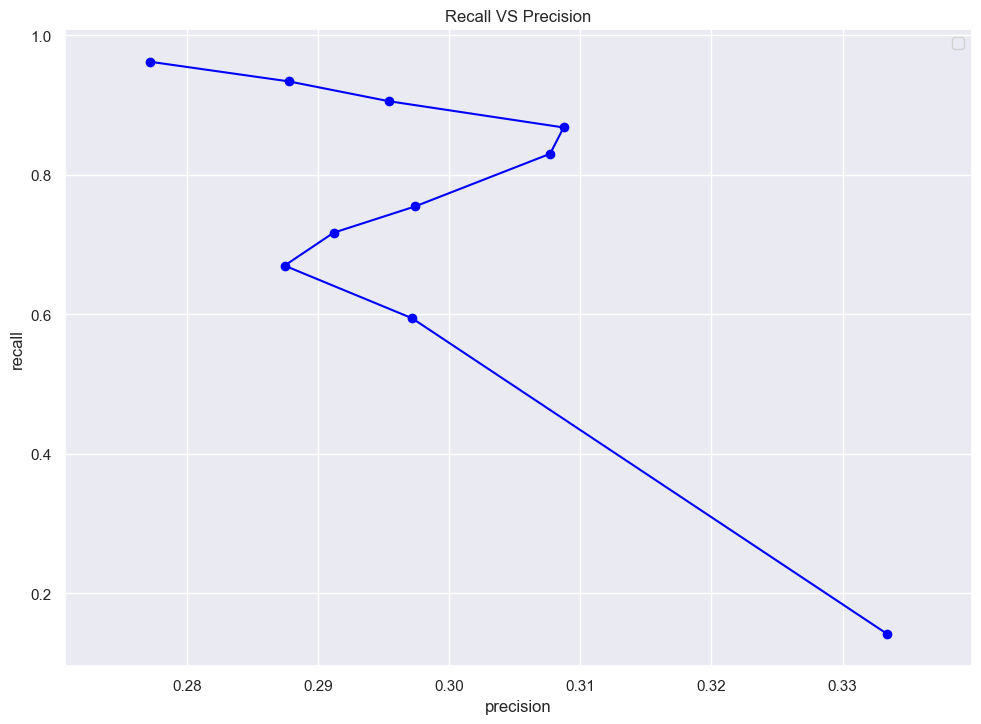

In [21]:
import matplotlib.pyplot as plt
plt.scatter(precision, recall, color='blue')
plt.plot(precision, recall, color='blue')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Recall VS Precision')
plt.legend()

## Appendix B : Plot F1, balancedAccuracy with Different Threshold

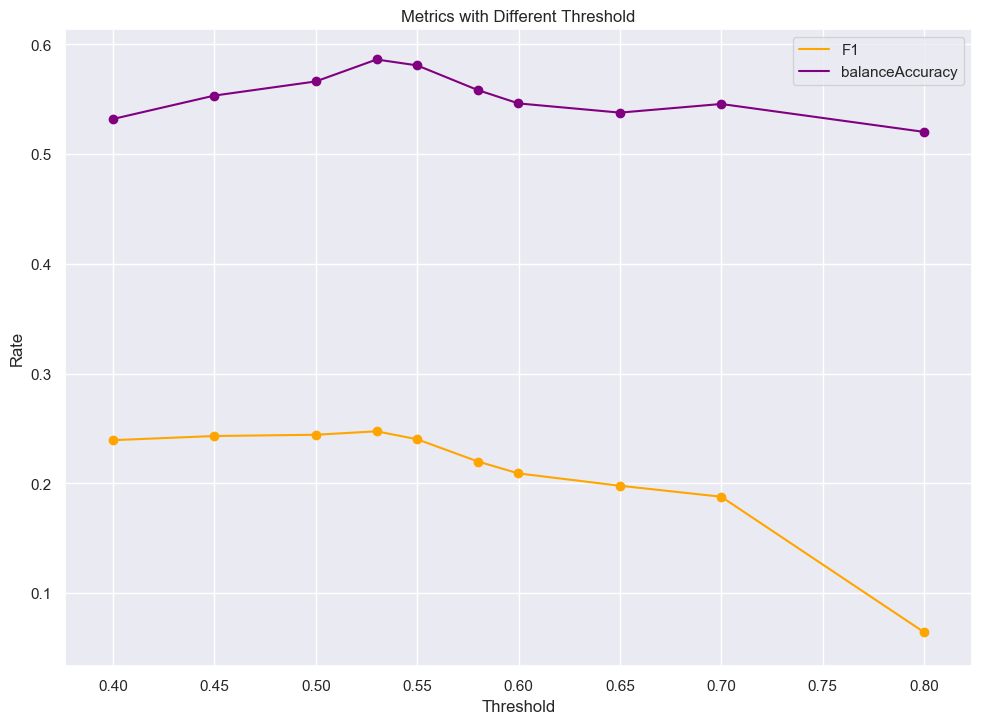

In [22]:
import matplotlib.pyplot as plt
plt.scatter(thresdArray, F1, color='orange')
plt.plot(thresdArray, F1, color='orange', label="F1")
plt.scatter(thresdArray,balanceAccuracy, color='purple')
plt.plot(thresdArray, balanceAccuracy, color='purple', label="balanceAccuracy")
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Metrics with Different Threshold')
plt.legend()

## Appendix C : Plot Accuracy, balancedAccuracy with Different Thresholds

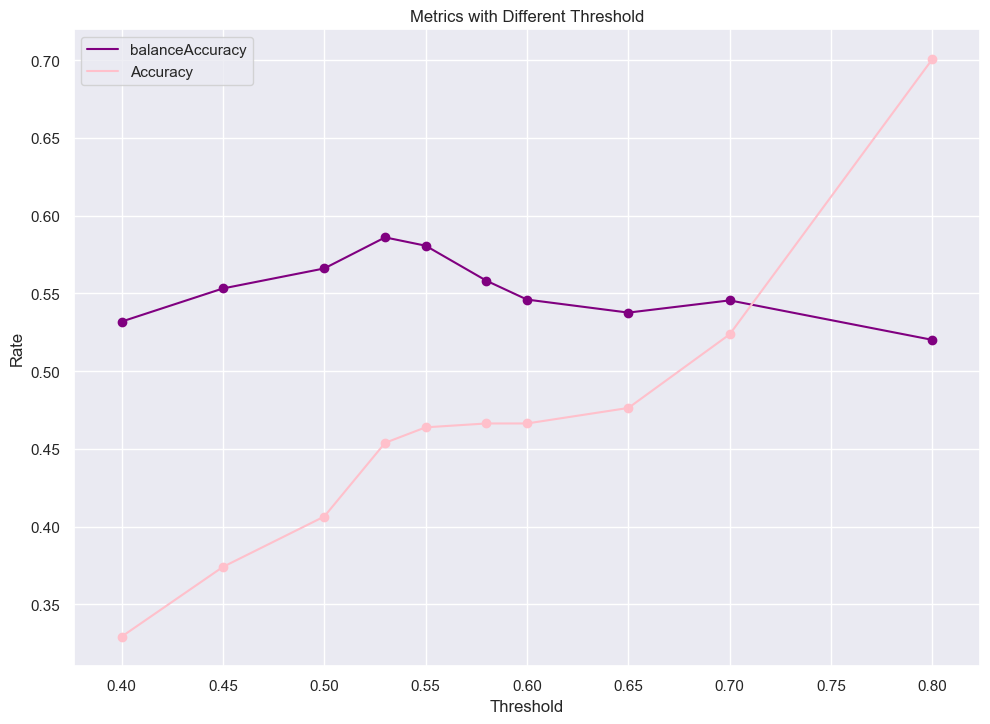

In [23]:
plt.scatter(thresdArray,balanceAccuracy, color='purple')
plt.plot(thresdArray, balanceAccuracy, color='purple', label="balanceAccuracy")
plt.scatter(thresdArray,Accuracy, color='pink')
plt.plot(thresdArray, Accuracy, color='pink', label="Accuracy")
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Metrics with Different Threshold')
plt.legend()

## Appendix D : Plot Accuracy, Specificity with Different Thresholds

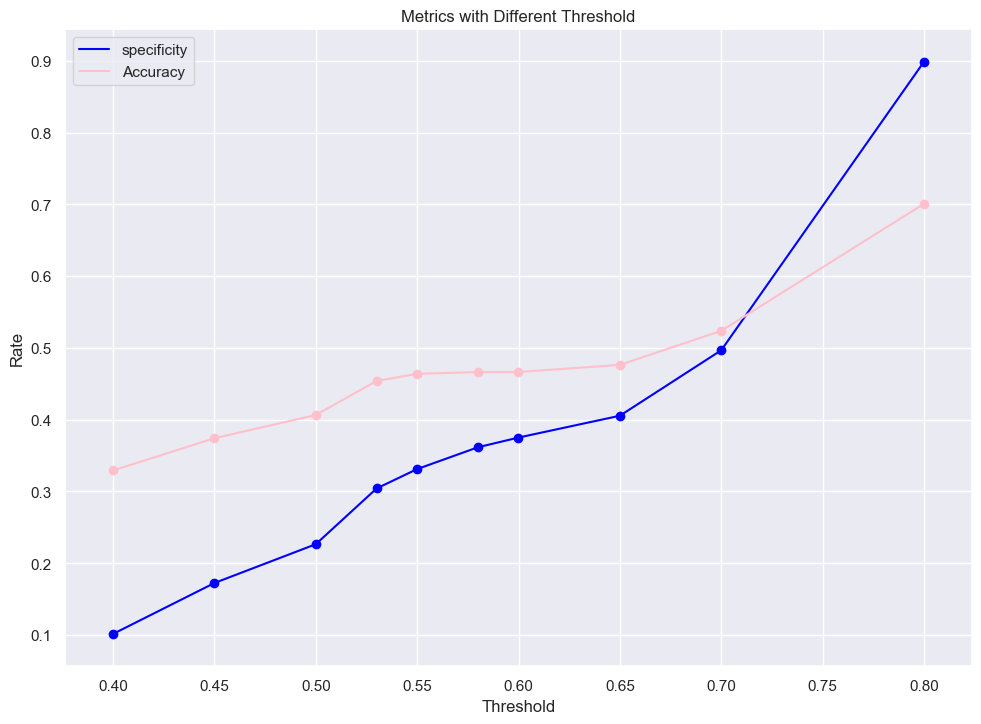

In [24]:
plt.scatter(thresdArray,specificity, color='blue')
plt.plot(thresdArray, specificity, color='blue', label="specificity")
plt.scatter(thresdArray,Accuracy, color='pink')
plt.plot(thresdArray, Accuracy, color='pink', label="Accuracy")
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Metrics with Different Threshold')
plt.legend()